<a href="https://colab.research.google.com/github/cnwokoye1/Randomized-SVD/blob/main/Randomized_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

plt.rcParams['figure.figsize'] = [32, 12]
plt.rcParams.update({'font.size': 18})

# Define randomized SVD function
# X = matrix, r = target rank, q = # of power iterations, p = oversampling factor
def rSVD(X, r, q, p):
  # Step 1: Sample column space of X with P matrix
  ny = X.shape[1]
  p = np.random.randn(ny, r+p)
  Z = X @ p
  # power iterations
  for k in range(q):
    z = X @ (X.T @ Z)

  # Compute QR factorization of Z to get an orthonormal basis for the column space
  Q, R = np.linalg.qr(Z, mode='reduced')

  # Step 2: Compute SVD on projected Y = Q.T @ X
  Y = Q.T @ X
  UY, S, VT = np.linalg.svd(Y, full_matrices=0)
  U = Q @ UY

  return U, S, VT

In [2]:
A = imread('../content/drive/MyDrive/Colab-Notebooks/Randomized-SVD/jupiter.jpg')
X = np.mean(A, axis=2) # Convert RGB -> grayscale

U, S, VT = np.linalg.svd(X, full_matrices=0) # Deterministic SVD

r = 400 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X, r, q, p)

In [3]:
## Reconstruction of Jupiter using the SVD approximations
XSVD = U[:, :(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1), :] # SVD approximation
errSVD = np.linalg.norm(X-XSVD, ord=2) / np.linalg.norm(X, ord=2)

XrSVD = rU[:, :(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1), :] # rSVD approximation
errSVD = np.linalg.norm(X-XrSVD, ord=2) / np.linalg.norm(X, ord=2)

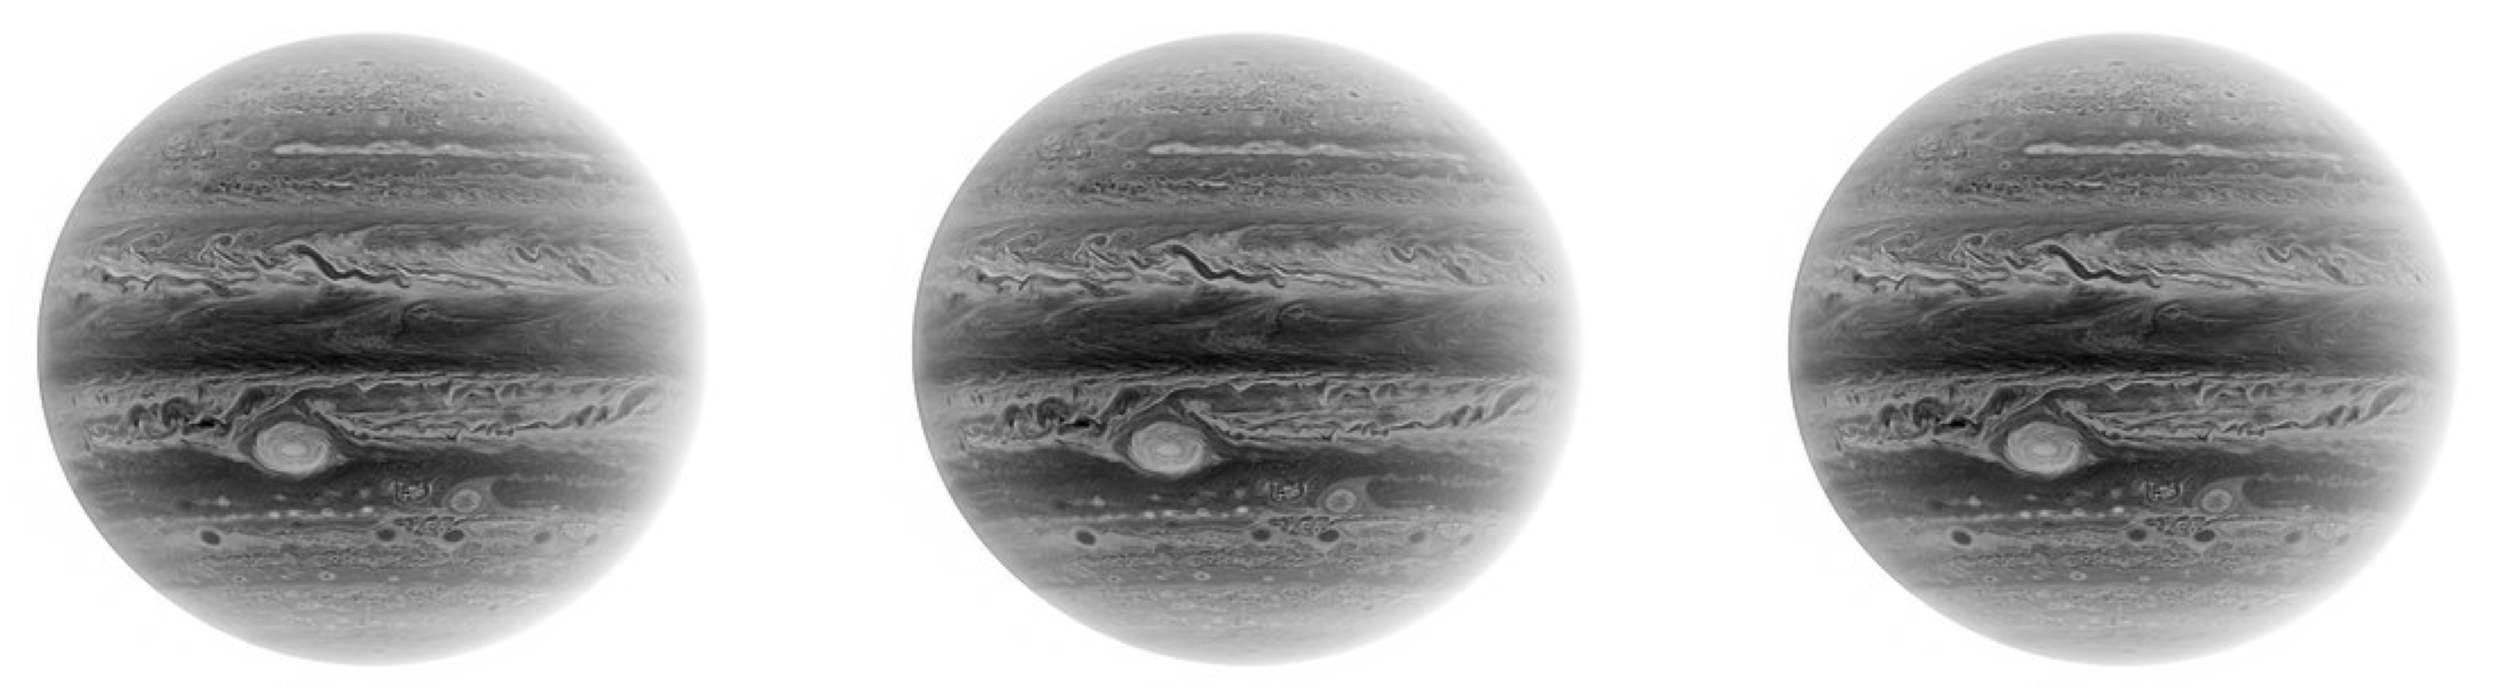

In [4]:
## Plot
fig, axs = plt.subplots(1, 3)

plt.set_cmap('gray')
axs[0].imshow(256-X)
axs[0].axis('off')
axs[1].imshow(256-XSVD)
axs[1].axis('off')
axs[2].imshow(256-XrSVD)
axs[2].axis('off')

plt.show()

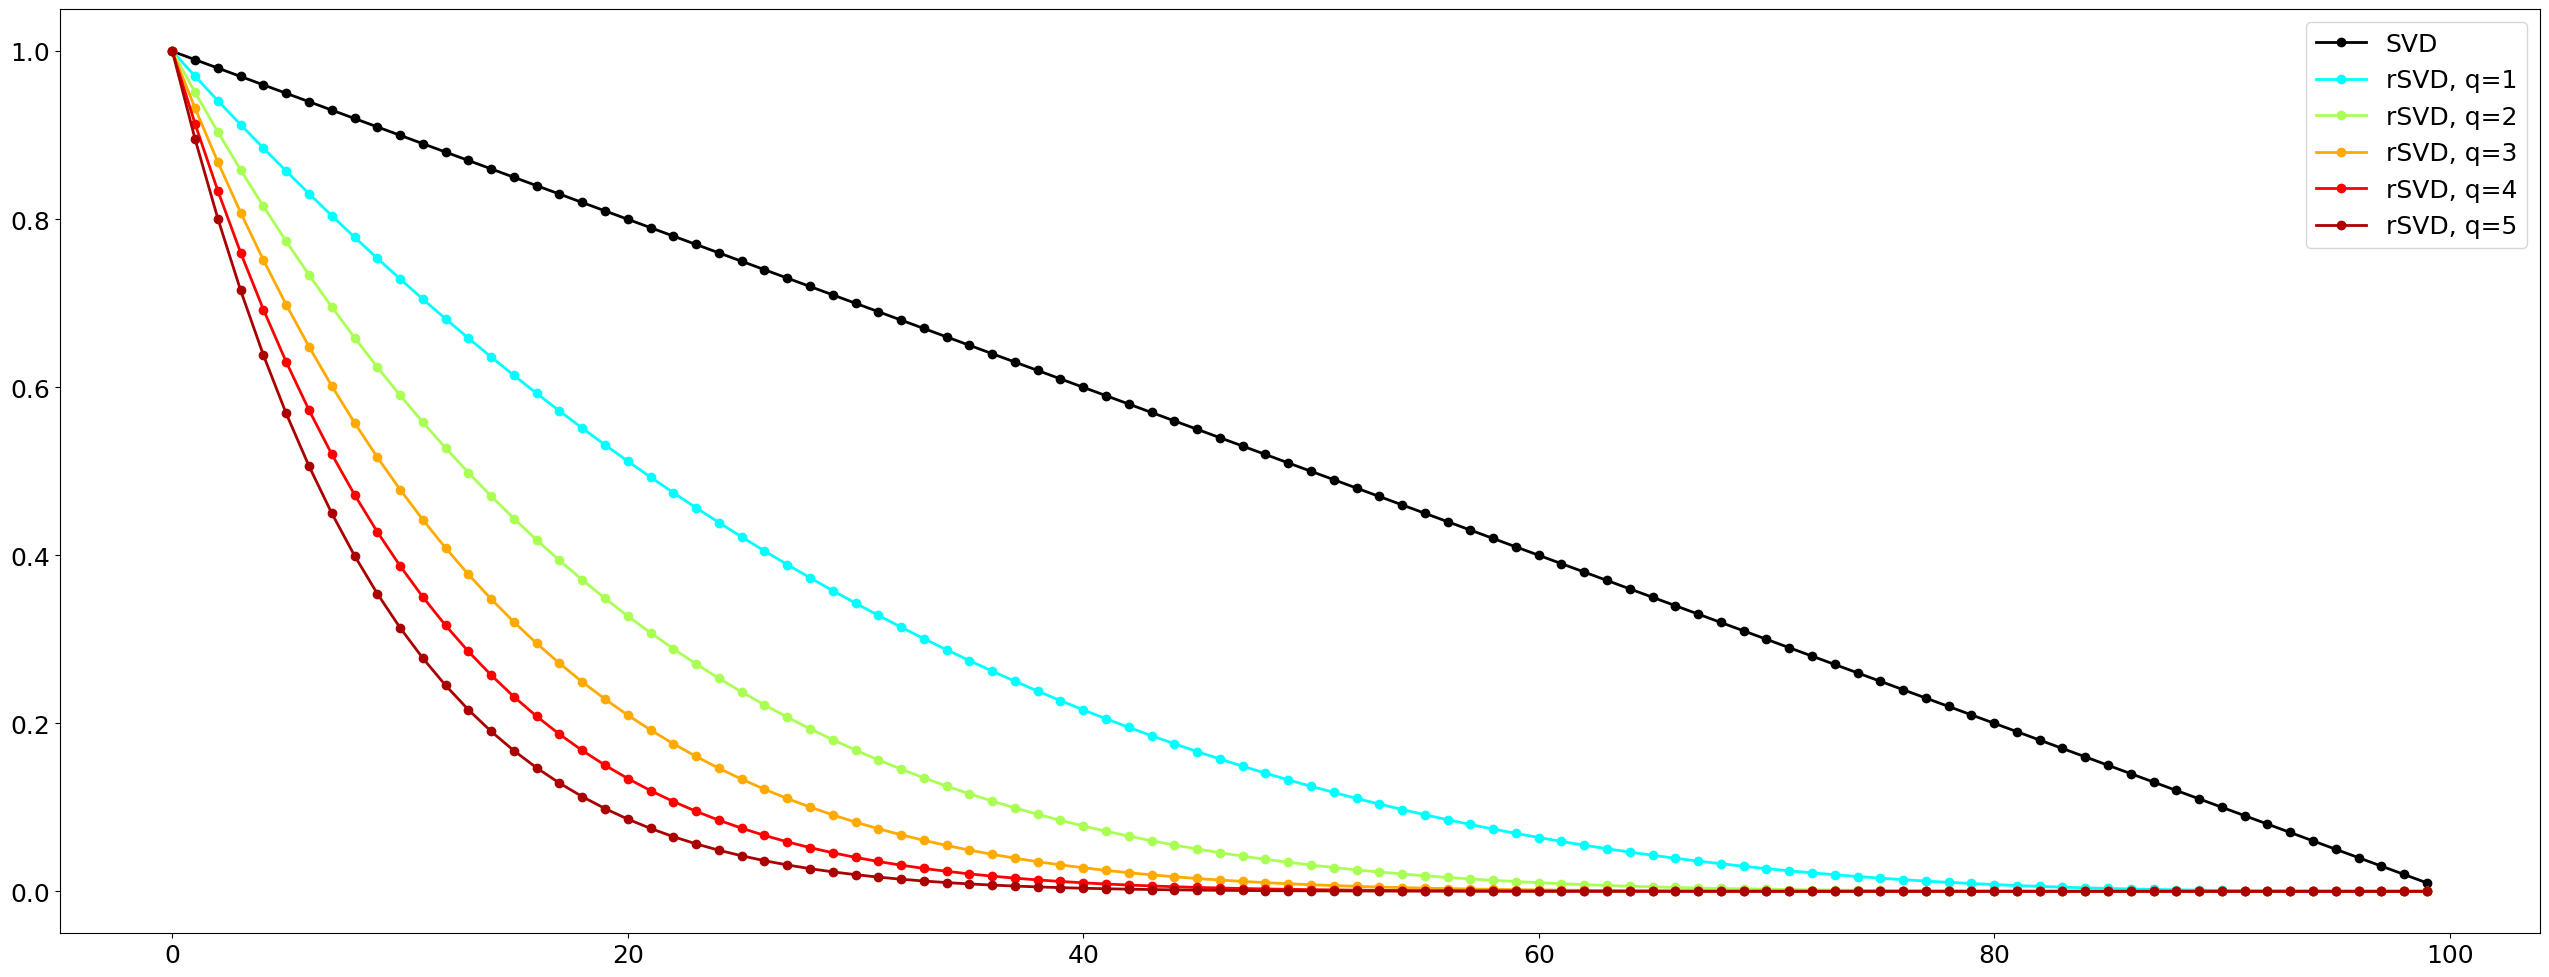

In [5]:
## Illustrate power iterations
X = np.random.randn(1000, 100)
U, S, VT = np.linalg.svd(X, full_matrices=0)
S = np.arange(1, 0, -0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3], # Define color map
                       [0,0,1],
                       [0,2/3,1],
                       [0,1,1],
                       [1/3,1,2/3],
                       [2/3,1,1/3],
                       [1,1,0],
                       [1,2/3,0],
                       [1,1/3,0],
                       [1,0,0],
                       [2/3,0,0]])

plt.plot(S, 'o-', color='k', linewidth=2, label='SVD')

Y = X
for q in range(1, 6):
  Y = X.T @ Y
  Y = X @ Y
  Uq, Sq, VTq = np.linalg.svd(Y, full_matrices=0)
  plt.plot(Sq, 'o-', color=tuple(color_list[min(2*q+1, len(color_list)-1)]), linewidth=2, label=f'rSVD, q={q}')

plt.legend()
plt.show()